In this example we look at the use of the numpy library to do a least squares optimization algorythm.  This example is taken and modified from the Optimization chapter of the Numpy help lib online.  We do not reproduce quite the same data or system here but rather use this as a basis to construct more complex solutions (fits) to functions that we are intereseded in. More documentation will be provided.

# Setting up

 In this section we import the numpy lib and set up the basic problem.  We will need both a true function and some noisy data to fit the algorythm to.  

In [1]:
from numpy import arange, sin, pi, random, array   # import lib
x = arange(0, 6e-2, 6e-2 / 30)                     # make x data, use cell to look at the output if needed
A, k, theta = 10, 1.0 / 3e-2, pi / 6e-2            # Make a complete list of parameters for the model
                                                   # First these are used to create a noisy data set 
                                                   # the they will be optimized
y_true = A * sin(2 * pi * k * x + theta)           # Create the actual fucntion to be used in making noisy data
y_meas = y_true + 2*random.randn(len(x))           # Create the noisy data

In [2]:
x  # x data look at how the arrange fucntion works here.

array([ 0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ,  0.012,  0.014,
        0.016,  0.018,  0.02 ,  0.022,  0.024,  0.026,  0.028,  0.03 ,
        0.032,  0.034,  0.036,  0.038,  0.04 ,  0.042,  0.044,  0.046,
        0.048,  0.05 ,  0.052,  0.054,  0.056,  0.058])

In [3]:
def residuals(p, y, x):
    A, k, theta = p
    err = y - A * sin(2 * pi * k * x + theta)
    return err

In [4]:
def peval(x, p):
    return p[0] * sin(2 * pi * p[1] * x + p[2])

In [5]:
p0 = [8, 1 / 2.3e-2, pi / 3]
print(array(p0))

[  8.          43.47826087   1.04719755]


In [6]:
from scipy.optimize import leastsq
plsq = leastsq(residuals, p0, args=(y_meas, x))
print(plsq[0])

[  9.87776826  34.19080283   1.99880463]


In [20]:
print(array([A, k, theta]))

[ 10.          33.33333333  52.35987756]


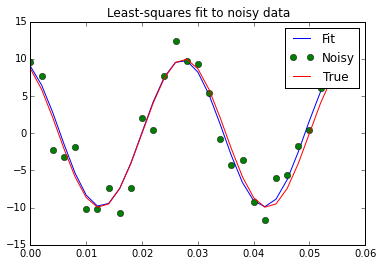

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, peval(x, plsq[0]),x,y_meas,'o',x,y_true)
plt.title('Least-squares fit to noisy data')
plt.legend(['Fit', 'Noisy', 'True'])
plt.show();

In [13]:
from __future__ import division
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing(use_unicode=True)

In [14]:
f = exp(-x**2/10)

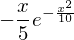

In [15]:
diff(f,x)